## Exercise 7 - Data visualization
- Different data sources will be utilized in this exercise.
- **Important**: Remember to adjust the size of each visualized graph using figsize parameter for plot method for better viewing experience!

1 Read the earthquakes.csv file and save its content into a variable. Then use bar chart to visualize magnitude values being 8.2 or over so that date values will be presented in x-axle and magnitude in y-axle.

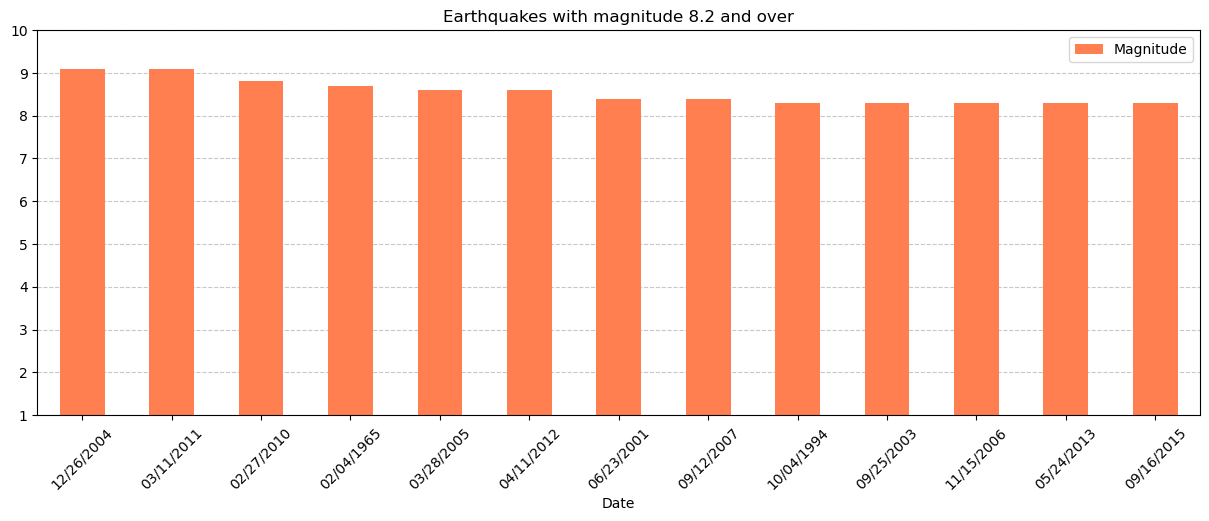

In [2]:
import pandas as pd

eq = pd.read_csv("data_files/earthquakes.csv",delimiter=",")
eq_mag = eq[(eq["Magnitude"] > 8.2)]

ax = eq_mag.sort_values("Magnitude", ascending=False).plot(
    kind="bar", 
    x="Date",
    y="Magnitude",
    figsize=(15,5),
    color="coral",
    title="Earthquakes with magnitude 8.2 and over",
    rot=45, 
    ylim=(1, 10),
    )
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

2 Read the gamedata.json file to a new variable. Visualize the data with pie chart so that share count will be counted for each Steam rating (in other words how many percentage out of all games have received which rating, for example Very Positive rating).

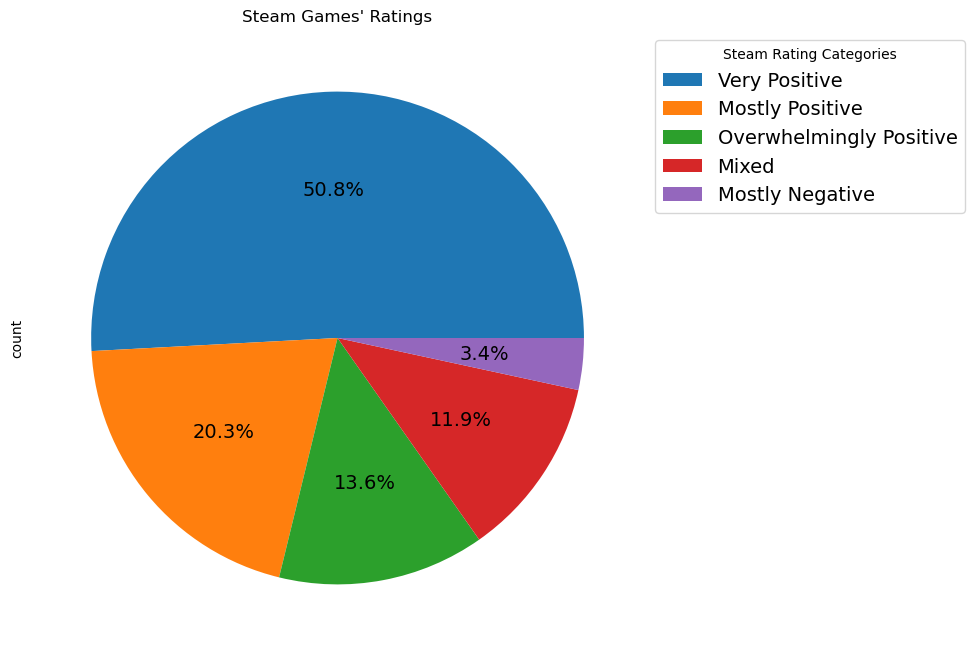

In [3]:
games = pd.read_json("data_files/gamedata.json", lines=False)

rating_counts = games["steamRatingText"].value_counts()

ax = rating_counts.plot(
    kind="pie", 
    labels=[""]*len(rating_counts),
    autopct="%1.1f%%", 
    figsize=(8, 8), 
    textprops={'fontsize': 14},
    title="Steam Games' Ratings")
ax.legend(
    labels=rating_counts.index, 
    title="Steam Rating Categories", 
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    fontsize=14)

3 Use the same game_data.json as above and create a scatter plot where you compare the relationships for metacriticScore and salePrice.

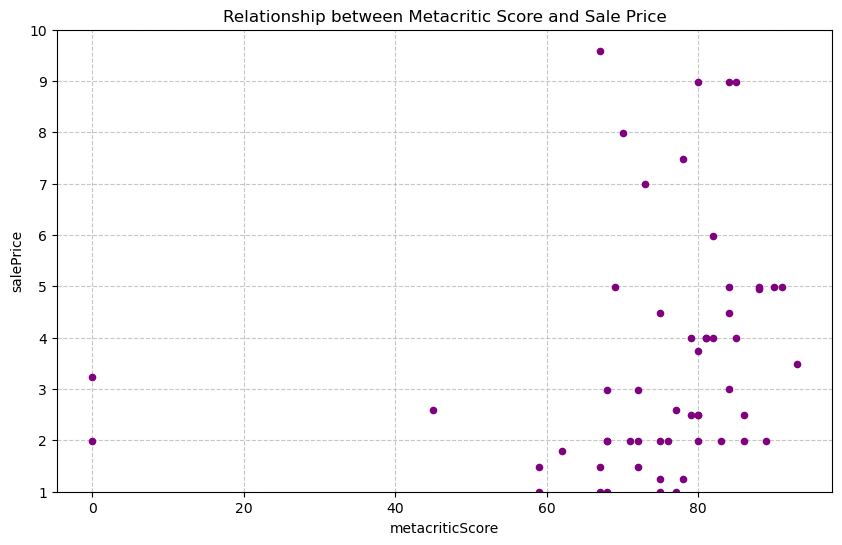

In [4]:
ax = games.plot.scatter(
    x='metacriticScore', 
    y='salePrice', 
    figsize=(10, 6), 
    color="purple",
    title='Relationship between Metacritic Score and Sale Price',
    ylim=(1, 10),
    grid=True
    )

ax.grid(linestyle="--", alpha=0.7, zorder=0)
ax.set_axisbelow(True)


4 Use earthquake data you read earlier (the unfiltered original data) and create a scatter plot for magnitude values using Longitude and Latitude values for x- and y-axles correspondingly. In addition, use colormap for magnitude values.

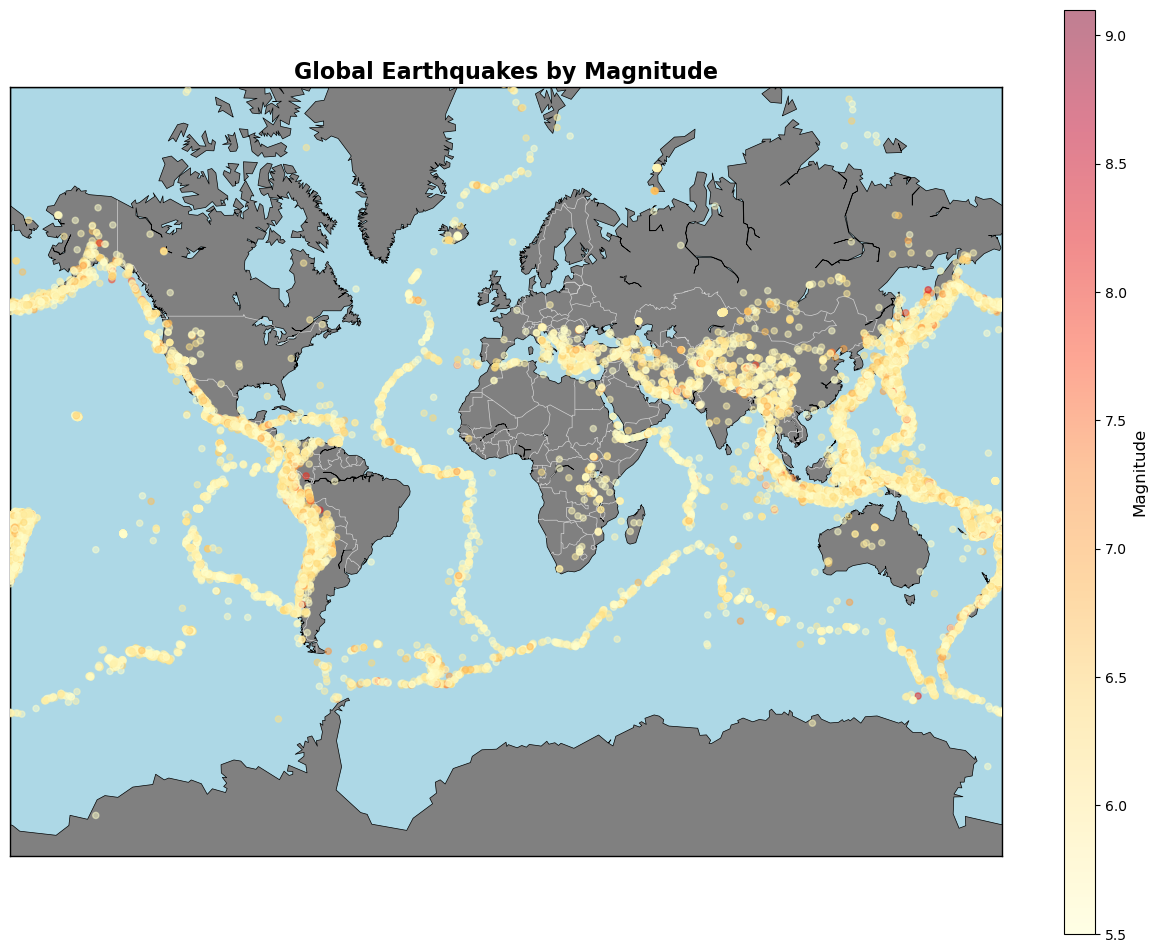

In [25]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16, 12))

m = Basemap(projection='merc',
            llcrnrlat=-80, urcrnrlat=80, 
            llcrnrlon=-180, urcrnrlon=180, 
            resolution='c')

m.drawcoastlines(linewidth=0.5, color='black')
m.drawcountries(linewidth=0.5, color='lightgray')
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='gray',lake_color='lightblue')

x, y = m(eq["Longitude"].values, eq["Latitude"].values)

sc = m.scatter(
    x, 
    y, 
    c=eq["Magnitude"].values, 
    cmap='YlOrRd', 
    alpha=0.5, 
    marker='o', 
    s=20,
    zorder=5)

cbar = plt.colorbar(sc, pad=0.05, aspect=30)
cbar.set_label("Magnitude", fontsize=12)

plt.title("Global Earthquakes by Magnitude", fontsize=16, fontweight='bold')

plt.show()
